In [9]:
import os
from pymystem3 import Mystem
import pymorphy2

In [6]:
pip install pymystem3

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pymorphy2

Note: you may need to restart the kernel to use updated packages.


In [11]:
m = Mystem()

In [24]:
separator = '. '

In [94]:
def partOfSpeech(word, posFile):
    wordPos = m.analyze(word)
    pos = ''
    for item in wordPos:
        if 'analysis' in item:
            gr = item['analysis'][0]['gr']
            pos = gr.split('=')[0].split(',')[0]
    posFile.write(word + ' ' + pos + '\n')

In [100]:
def cleanSentence(sentence, posFile):
    handledWords = []
    words = sentence.split()
    for word in words:
        word = word.strip()
        word = word.lower()
        #partOfSpeech(word, posFile)
        handledWords.append(word.strip(',.!?"()-:;/\|'))
    return ' '.join(handledWords)

In [80]:
def fileHandle(filename, fileOutputName):
    f = open(filename, 'r', encoding='utf-8')
    output = open(fileOutputName, 'w+', encoding='utf-8')
    pos = open('postext.txt', 'w+', encoding='utf-8')
    s = f.read()
    sentences = s.split(separator)
    for item in sentences:
        lemmas = m.lemmatize(cleanSentence(item, pos))
        output.write(''.join(lemmas))
    output.close()
    pos.close()
    f.close()

In [107]:
!pip install gensim

In [108]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

In [166]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [165]:
fileHandle('dost.txt', 'lemas.txt')

In [167]:
f = 'lemas.txt'
data = gensim.models.word2vec.LineSentence(f)

In [202]:
%time model_dost = gensim.models.Word2Vec(data, vector_size=300, window=8, min_count=2)

2021-12-08 13:57:39,171 : INFO : collecting all words and their counts
2021-12-08 13:57:39,173 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-08 13:57:39,257 : INFO : collected 13468 word types from a corpus of 177027 raw words and 6057 sentences
2021-12-08 13:57:39,257 : INFO : Creating a fresh vocabulary
2021-12-08 13:57:39,296 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 6940 unique words (51.52955152955153%% of original 13468, drops 6528)', 'datetime': '2021-12-08T13:57:39.296760', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-12-08 13:57:39,296 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 170499 word corpus (96.31242691792778%% of original 177027, drops 6528)', 'datetime': '2021-12-08T13:57:39.296760', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03

Wall time: 1.11 s


Parameters were chosen with regard to what was said in the summary of the lesson: more that 300 vector size doesn't make it better, window is 8 because we need our model for semantic and min_count is 2 to get rid of the "long tail" of words that were used once.

In [203]:
model_dost.init_sims(replace=True)
model_path = "dost.bin"

print("Saving model...")
model_dost.wv.save_word2vec_format(model_path, binary=True)

2021-12-08 13:57:49,143 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2021-12-08 13:57:49,156 : INFO : storing 6940x300 projection weights into dost.bin


Saving model...


In [204]:
print(len(model_dost.wv.key_to_index))

6940


In [205]:
print([w for w in model_dost.wv.key_to_index][:400])

['и', '–', 'он', 'не', 'в', 'что', 'я', 'быть', 'на', 'с', 'она', 'вы', 'а', 'как', 'это', 'то', 'так', 'но', 'же', 'весь', 'этот', 'все', 'да', 'ты', 'к', 'бы', 'они', 'мочь', 'один', 'у', 'еще', 'даже', 'по', 'за', 'свой', 'раскольников', 'себя', 'только', 'знать', 'сам', 'теперь', 'вдруг', 'вот', 'его', 'сказать', 'уже', 'от', 'тот', 'говорить', 'ведь', 'ну', 'человек', 'уж', 'становиться', 'из', 'о', 'такой', 'который', 'до', 'очень', 'мы', 'самый', 'соня', 'ли', 'опять', 'рука', 'нет', 'если', 'разумихин', 'тут', 'дело', 'мой', 'хотеть', 'раз', 'когда', 'ивановна', 'ни', 'другой', 'тоже', 'петрович', 'потому', 'минута', 'какой', 'ваш', 'какой-то', 'пойти', 'видеть', 'совсем', 'понимать', 'время', 'смотреть', 'или', 'ничто', 'для', 'выходить', 'тогда', 'ее', 'стоять', 'лицо', 'чтобы', 'два', 'во', 'слово', 'глаз', 'спрашивать', 'дверь', 'катерина', 'думать', 'будто', 'надо', 'приходить', 'комната', 'со', 'дуня', 'начинать', 'голова', 'почти', 'свидригайлов', 'порфирий', 'там', 'что

In [215]:
model_dost.wv.most_similar('бог', topn=10)

[('прощать', 0.9997504949569702),
 ('извинять', 0.9997163414955139),
 ('почему', 0.9996880292892456),
 ('лгать', 0.9996306896209717),
 ('зайти', 0.9995552897453308),
 ('господи', 0.9995284676551819),
 ('сейчас', 0.9994646906852722),
 ('куда', 0.9994579553604126),
 ('батюшка', 0.9994152784347534),
 ('мой', 0.9993937015533447)]

In [216]:
model_dost.wv.similarity("преступление","убийство")

0.99967825

In [295]:
model_dost.wv.doesnt_match("улица мост площадь комната".split())

'комната'

For the presentation I left only the best examples from what I tested. I think, they show that some semantic tasks are solved correctly by this model.

In [218]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [234]:
words = ['раскольников', 'соня', 'дуня','разумихин', 'старуха', 'порфирий', 'мармеладов', 'свидригайлов']
X = model_dost.wv[words]

In [235]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

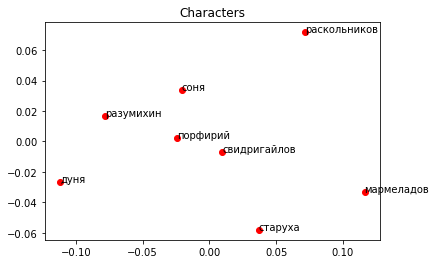

In [236]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Characters')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

It seems that higher scores on vertical show how "main" the character is, or how frequently it is mentioned. They probably move to the right or to the left depending on how frequent they are mentioned together.

In [271]:
sent = "Он был задавлен бедностью; но даже стесненное положение перестало в последнее время тяготить его. Насущными делами своими он совсем перестал и не хотел заниматься."
#'И каждый раз молодой человек, проходя мимо, чувствовал какое-то болезненное и трусливое ощущение, которого стыдился и от которого морщился. Он был должен кругом хозяйке и боялся с нею встретиться.'
lem = m.lemmatize(sent)
ana = m.analyze(sent)
sent2 = []
for word in ana:
    if 'analysis' in word:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        lex = word['analysis'][0]['lex']
        synonyms = model_dost.wv.most_similar(lex, topn=20)
        sy = []
        for i in synonyms:
            sy.append(list(i)[0])
        synana = m.analyze(str(sy))
        synonym = lex
        for syn in synana:
            if 'analysis' in syn:
                gr2 = syn['analysis'][0]['gr']
                pos2 = gr2.split('=')[0].split(',')[0]
                if pos == pos2:
                    synonym=syn['analysis'][0]['lex']
                    break
        sent2.append(synonym)
print(sent2)

['он', 'объяснять', 'успевать', 'сила', 'даже', 'даже', 'болезненный', 'общество', 'забывать', 'на', 'полный', 'мгновение', 'встречаться', 'он', 'маленький', 'подлец', 'который', 'он', 'больше', 'забывать', 'и', 'уж', 'видеть', 'встречать']


In [279]:
#sent = sent.split()
sent1 = []
for w in sent:
    w = w.lower()
    w = w.strip('.,;')
    sent1.append(w)
print(sent1)

['он', 'был', 'задавлен', 'бедностью', 'но', 'даже', 'стесненное', 'положение', 'перестало', 'в', 'последнее', 'время', 'тяготить', 'его', 'насущными', 'делами', 'своими', 'он', 'совсем', 'перестал', 'и', 'не', 'хотел', 'заниматься']


In [268]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

2021-12-08 18:37:22,226 : INFO : Loading dictionaries from C:\Users\user\anaconda3\lib\site-packages\pymorphy2_dicts_ru\data
2021-12-08 18:37:22,292 : INFO : format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


In [290]:
res = ''
for i in range(len(sent1)):
    ana = morph.parse(sent1[i])[0]
    ana2 = morph.parse(sent2[i])[0]
    w = ana2.word
    for form in ana2.lexeme:
        if str(ana.tag).split()[-1] == str(form.tag).split()[-1]: #сравниваем только непостоянные морф признаки - после ' ' в tag
            w = form.word
            break
    res = res + w + ' '
print(res)

он объяснял успевать силой даже даже болезненное общество забывало на полное мгновение встречаться его маленькими подлецами которыми он больше забывал и уж видел встречать 
